In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
data[pd.isnull(data['height'])].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [5]:
print('для height пустых строк ' + str(len(data[pd.isnull(data['height'])])))
print('для weight пустых строк ' + str(len(data[pd.isnull(data['weight'])])))
print('для sport пустых строк ' + str(len(data[pd.isnull(data['sport'])])))
print('всего строк в наборе ' + str(len(data)))

для height пустых строк 330
для weight пустых строк 659
для sport пустых строк 0
всего строк в наборе 11538


In [6]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [7]:
data = data[pd.isnull(data['height']) == 0]
data = data[pd.isnull(data['weight']) == 0]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
features_columns = [c for c in data.columns if c != 'sex']

In [11]:
X = data[features_columns]

In [12]:
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [13]:
y = data['sex']

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [15]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [16]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [17]:
le.fit(data['sex'])

LabelEncoder()

In [18]:
y = pd.Series(data = le.transform(data['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [19]:
model = LogisticRegression()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [21]:
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import roc_curve

In [23]:
predictions = model.predict_proba(X_test)

In [24]:
fpr, tpr, thres = roc_curve(y_test, predictions[:,1])

In [25]:
for line in zip(fpr, tpr, thres):
    print (line)

(0.0, 0.0, 1.9999617356790298)
(0.0, 0.0005747126436781609, 0.9999617356790298)
(0.0, 0.009770114942528735, 0.9978406114173968)
(0.0, 0.010919540229885057, 0.9977021485077925)
(0.0, 0.011494252873563218, 0.9976651187314474)
(0.0, 0.01264367816091954, 0.9976428383332921)
(0.0, 0.020114942528735632, 0.996610996812559)
(0.0, 0.021264367816091954, 0.996528143704205)
(0.0, 0.022988505747126436, 0.9964566189976961)
(0.0, 0.02413793103448276, 0.9964501611567553)
(0.0, 0.02471264367816092, 0.9963817485718017)
(0.0, 0.02586206896551724, 0.9963472665650133)
(0.0006587615283267457, 0.02586206896551724, 0.9962535583330361)
(0.0006587615283267457, 0.039655172413793106, 0.9929309936092706)
(0.0013175230566534915, 0.039655172413793106, 0.9928638613698465)
(0.0013175230566534915, 0.041379310344827586, 0.991785509438305)
(0.0013175230566534915, 0.04252873563218391, 0.9916808032045652)
(0.0013175230566534915, 0.04367816091954023, 0.9906546669813071)
(0.0013175230566534915, 0.04482758620689655, 0.9905016

In [26]:
from matplotlib import pyplot as plt

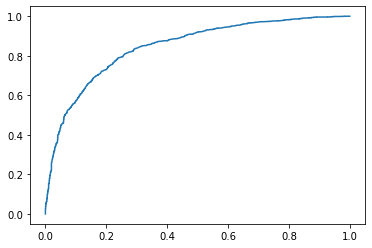

In [27]:
plt.plot(fpr, tpr)

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
roc_auc_score(y_test, predictions[:,1])

0.8463347871518786

In [30]:
tp = 0
fp = 0
fn = 0
tn = 0

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:,1], y_test):
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    if predicted ==1:
        if actual == 1:
            tp += 1
        else:
            fp +=1
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1
        

In [31]:
(tp + tn)/(tp + tn + fp + fn)

0.7725598526703499

In [32]:
precision = tp/(tp + fp)
precision

0.7830028328611898

In [33]:
from sklearn.metrics import precision_recall_curve

In [34]:
pr, re, thres = precision_recall_curve(y_test, predictions[:,1])

In [35]:
for line in zip(pr, re, thres):
    print(line)

(0.5383663366336634, 1.0, 0.03738663396072575)
(0.5382234602290312, 0.9994252873563219, 0.037496005513267164)
(0.538390092879257, 0.9994252873563219, 0.037674500299550454)
(0.5385568287395478, 0.9994252873563219, 0.03779749642291933)
(0.538723667905824, 0.9994252873563219, 0.039084033330530475)
(0.5388906104741246, 0.9994252873563219, 0.04061983419962438)
(0.5390576565406076, 0.9994252873563219, 0.041224663327013626)
(0.5392248062015503, 0.9994252873563219, 0.04173242966434832)
(0.5395594166925225, 0.9994252873563219, 0.04395044885955317)
(0.5398944427196523, 0.9994252873563219, 0.04489667244376979)
(0.5402298850574713, 0.9994252873563219, 0.04586229034869298)
(0.5403977625854568, 0.9994252873563219, 0.046563337573153875)
(0.5405657444824371, 0.9994252873563219, 0.04665419250537621)
(0.5404228855721394, 0.9988505747126437, 0.04684765766814741)
(0.541095890410959, 0.9988505747126437, 0.04756301629590835)
(0.5414330218068536, 0.9988505747126437, 0.04771011359198852)
(0.5416017450919289, 

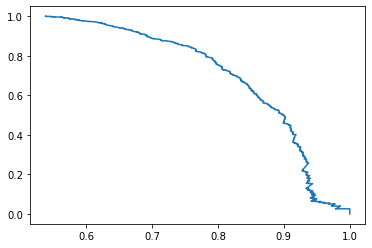

In [36]:
plt.plot(pr,re)

In [37]:
from sklearn.metrics import average_precision_score

In [38]:
average_precision_score(y_test, predictions[:,1])

0.8572110095778203

In [39]:
Xshort = X.loc[:,['height','weight']]

In [40]:
model2 = LogisticRegression()

In [41]:
X_train_short, X_test_short, y_train, y_test = train_test_split(Xshort, y, test_size = 0.3, random_state = 0)

In [42]:
model2.fit(X_train_short, y_train)

LogisticRegression()

In [43]:
predictions2 = model2.predict_proba(X_test_short)

In [44]:
fpr2, tpr2, thres2 = roc_curve(y_test, predictions2[:,1])

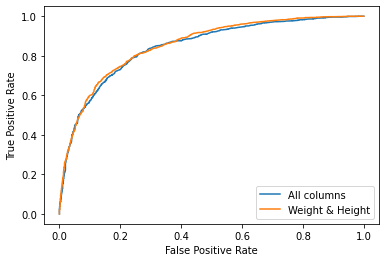

In [45]:
plt.plot(fpr, tpr, label = 'All columns')
plt.plot(fpr2, tpr2, label = 'Weight & Height')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = 0)
plt.show()